<a href="https://colab.research.google.com/github/wbandabarragan/nonlinear-dynamics-chaos/blob/main/unit-1/tutorials/8_Python_Solving_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving ODEs in Python:

1. Analytically (SymPy, https://www.sympy.org/en/index.html)

2. Geometrically (Poincaré's view)

3. Numerically (Numerical Methods: RK, Euler, etc.)

To install sympy:

``conda install sympy``

``pip install sympy``

## 1. Analytically solving ODEs with SymPy:

### Example:

We have this ODE:
$$\dot{x}= r\,x $$

In [1]:
# Import libraries
import sympy as sp

# To see the outputs in latex format, we use:
from sympy.interactive import printing
printing.init_printing(use_latex = True)

In [2]:
# We define symbols
t = sp.Symbol("t")

# For Function
x = sp.Function("x")(t)

In [3]:
display(x)

x(t)

In [4]:
# Define the LHS derivative
der_x = x.diff(t, 1)

display(der_x)

d       
──(x(t))
dt      

In [5]:
# Fix r
r = 1.

# ODE
diff_eq = sp.Eq(der_x - r*x, 0)

display(diff_eq)

            d           
-1.0⋅x(t) + ──(x(t)) = 0
            dt          

In [6]:
# Find the solution to the ODE:

result_eq = sp.dsolve(diff_eq, x)

display(result_eq)

           t
x(t) = C₁⋅ℯ 

In [7]:
# With initial conditions

result_eq1 = sp.dsolve(diff_eq, x, ics = {x.subs(t,0): 1})

display(result_eq1)

print(type(result_eq1))

        t
x(t) = ℯ 

<class 'sympy.core.relational.Equality'>


In [8]:
# Lamdify the expression

print(result_eq1.rhs)

rhs = result_eq1.rhs

# Function:
x_function = sp.lambdify(t, rhs, "numpy")

print(type(x_function))

exp(t)
<class 'function'>


### Plotting the solution:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate a time vector
t_vector = np.linspace(0., 20, 100)

# Evaluate the lambified function
x_vector = x_function(t_vector)

print(t_vector.shape, x_vector.shape)

(100,) (100,)


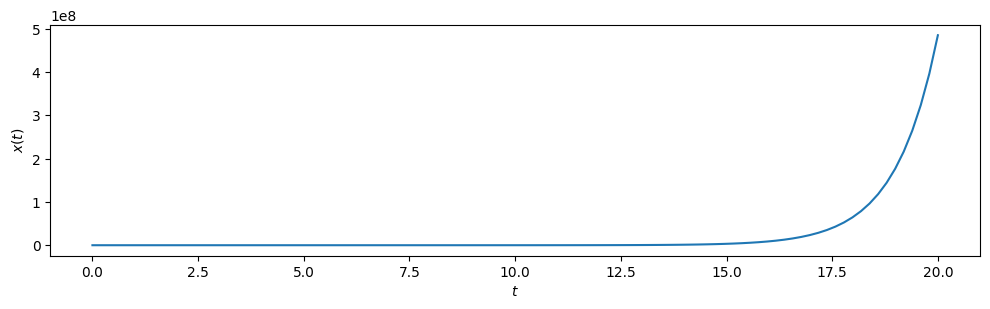

In [11]:
# Plotting

plt.figure(figsize=(12,3))

plt.plot(t_vector, x_vector)

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.show()

## 2. Geometrically (Poincaré's view)

In [12]:
# Calculate the velocities:
x_dot = x_vector*r

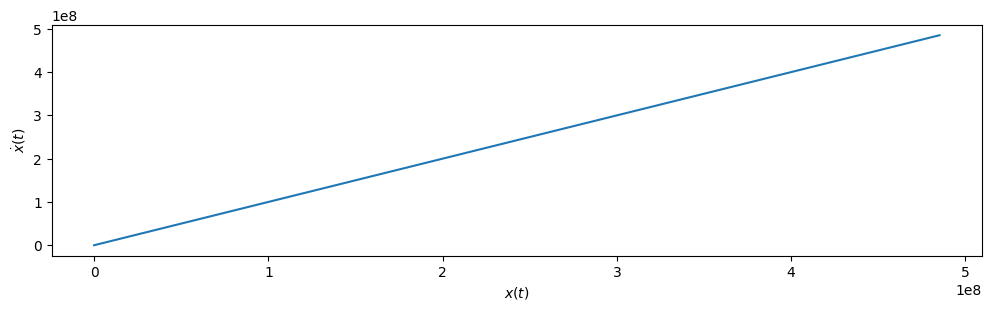

In [13]:
# Phase plot

# Plotting

plt.figure(figsize=(12,3))

plt.plot(x_vector, x_dot)

plt.xlabel(r"$x(t)$")
plt.ylabel(r"$\dot{x}(t)$")

plt.show()

### Example:

We have this ODE:
$$\dot{x}=rx\left(1-\frac{x}{K}\right)$$

In [14]:
# Fix the carrying capacity
K = 1.e1

# Non-linear ODE
diff_eq2 = sp.Eq(der_x - r*x*(1.-x/K), 0)

display(diff_eq2)

                             d           
-1.0⋅(1.0 - 0.1⋅x(t))⋅x(t) + ──(x(t)) = 0
                             dt          

In [15]:
# With initial conditions

result_eq2 = sp.dsolve(diff_eq2, x, ics = {x.subs(t,0): 1}, simplify = True)

display(result_eq2)

print(type(result_eq2))

           -10.0     
x(t) = ──────────────
                   -t
       -1.0 - 9.0⋅ℯ  

<class 'sympy.core.relational.Equality'>


In [16]:
# Lamdify the expression

print(result_eq2.rhs)

rhs2 = result_eq2.rhs

# Function:
x_function2 = sp.lambdify(t, rhs2, "numpy")

print(type(x_function2))

-10.0/(-1.0 - 9.0*exp(-t))
<class 'function'>


In [17]:
# Evaluate the lambified function
x_vector2 = x_function2(t_vector)

print(t_vector.shape, x_vector2.shape)

(100,) (100,)


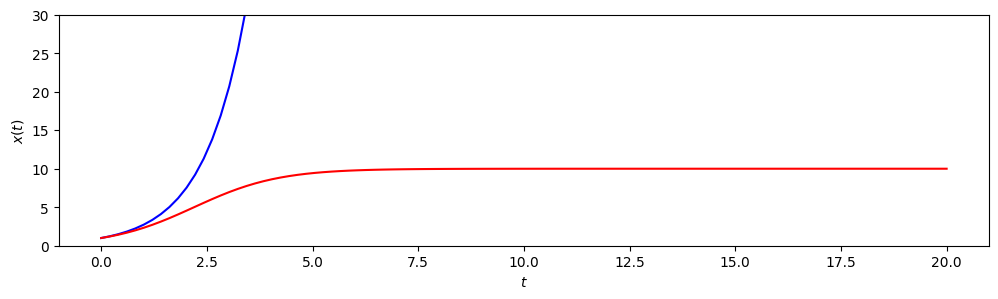

In [18]:
# Plotting

plt.figure(figsize=(12,3))

plt.plot(t_vector, x_vector, color = "blue")
plt.plot(t_vector, x_vector2, color = "red")


plt.ylim(0., 30.)
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.show()

### Phase Space

$$\dot{x}=rx\left(1-\frac{x}{K}\right)$$


In [20]:
# Define a lambda function for the velocity
x_dot_fun = lambda x: r*x*(1-x/K)

# Evaluate this in x
x_dot2 = x_dot_fun(x_vector2)

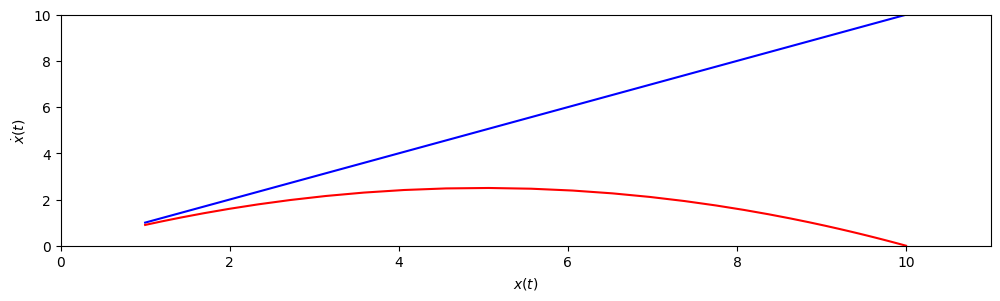

In [21]:
# Phase plot

# Plotting

plt.figure(figsize=(12,3))

plt.plot(x_vector, x_dot, color = "blue")
plt.plot(x_vector2, x_dot2, color = "red")

plt.xlabel(r"$x(t)$")
plt.ylabel(r"$\dot{x}(t)$")

plt.xlim(0., 11.)
plt.ylim(0., 10.)

plt.show()

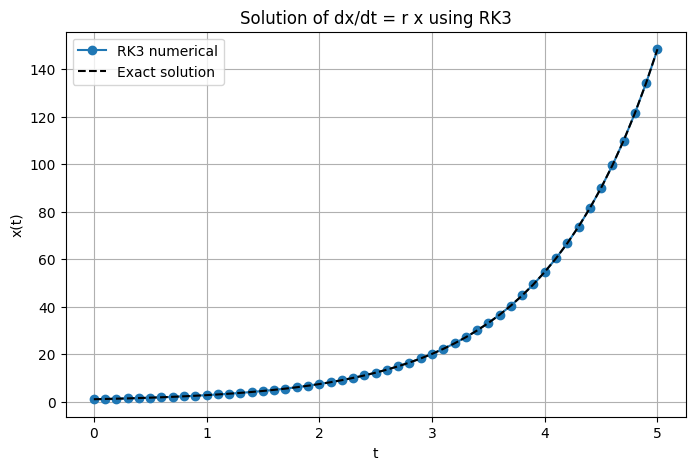

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0         # growth rate
x0 = 1.0        # initial condition
t0, tf = 0.0, 5.0
dt = 0.1        # time step

# Time array
t = np.arange(t0, tf + dt, dt)
x = np.zeros_like(t)
x[0] = x0

# Function f(t, x) = r * x
def f(t, x):
    return r * x

# RK3 integration loop
for n in range(len(t)-1):
    k1 = f(t[n], x[n])
    k2 = f(t[n] + dt/2, x[n] + dt/2 * k1)
    k3 = f(t[n] + dt, x[n] - dt * k1 + 2 * dt * k2)
    x[n+1] = x[n] + dt * (k1 + 4*k2 + k3) / 6

# Exact solution
x_exact = x0 * np.exp(r * t)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(t, x, 'o-', label='RK3 numerical')
plt.plot(t, x_exact, 'k--', label='Exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution of dx/dt = r x using RK3')
plt.legend()
plt.grid(True)
plt.show()
